# <font color='Violet'>Implementing Logistic regression using Stochastic Gradient Descent without using sklearn</font>

<font color='red'> Importing packages</font>

In [63]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

<font color='red'>Creating custom dataset</font>

In [64]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)


In [65]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [67]:
# Standardizing the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# <font color='red' size=5>SGD classifier using Sklearn</font>

In [69]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [70]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.70, NNZs: 15, Bias: -0.501317, T: 37500, Avg. loss: 0.552526
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 15, Bias: -0.752393, T: 75000, Avg. loss: 0.448021
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 15, Bias: -0.902742, T: 112500, Avg. loss: 0.415724
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 15, Bias: -1.003816, T: 150000, Avg. loss: 0.400895
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 15, Bias: -1.076296, T: 187500, Avg. loss: 0.392879
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 15, Bias: -1.131077, T: 225000, Avg. loss: 0.388094
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 1.73, NNZs: 15, Bias: -1.171791, T: 262500, Avg. loss: 0.385077
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 1.80, NNZs: 15, Bias: -1.203840, T: 300000, Avg. loss: 0.383074
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 1.86, NNZs: 15, Bias: -1.229563, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [71]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.89007184,  0.63162363, -0.07594145,  0.63107107, -0.38434375,
          0.93235243, -0.89573521, -0.07340522,  0.40591417,  0.4199991 ,
          0.24722143,  0.05046199, -0.08877987,  0.54081652,  0.06643888]]),
 (1, 15),
 array([-1.30580538]))



```
# This is formatted as code
```

## <font color='red' size=5> Implementing Logistic Regression with L2 regularization Using SGD: without using sklearn </font>




<br>
<h2>We will follow the below steps</h2>

1) Initialize the weight_vector and intercept term to zeros 

2) Create a loss function 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keep batch size=1)<br>

        - calculate the gradient of loss function w.r.t each weight in weight vector <br>

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br><br>

        - Calculate the gradient of the intercept <br><br>
           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$<br><br>

        - Update weights and intercept  <br><br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $<br><br>
    - calculate the log loss for train and test with the updated weights 
    - We can now compare the previous loss and the current loss, if it is not updating, then we can stop the training
    - We will append this loss in a list ( this will be used to see how loss is changing for each epoch after the training is over )


<font color='blue'>Initialize weights </font>

In [72]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #initialize bias to zero
    w = np.zeros_like(X_train[0])
    b = 0
    return w,b

In [73]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))


w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [74]:
import math
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    h = 1/(1+np.exp(-z))

    return h

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [75]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    l = len(y_pred)
    loss = 0
    for ele in range(0,l):
        temp_loss = (y_true[ele] * np.log10(y_pred[ele])) + ((1 - y_true[ele]) * np.log10(1 - y_pred[ele]))
        loss += temp_loss
    
    loss = (-1 * loss)/l
    return loss

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [76]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = (x * (y - sigmoid(np.dot(w,x) + b))) - ((alpha/N)*w)
    return dw

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [77]:
def gradient_db(x,y,w,b):
    db = y - sigmoid(np.dot(w,x) + b)
    return db

<font color='blue'> Implementing logistic regression</font>

In [78]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    # for every epoch
        # for every data point(X_train,y_train)
           #compute gradient w.r.to w (call the gradient_dw() function)
           #compute gradient w.r.to b (call the gradient_db() function)
           #update w, b
        # predict the output of x_train[for all data points in X_train] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        # predict the output of x_test[for all data points in X_test] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b

    return w,b

In [79]:
from tqdm import tqdm
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0,N):
    w,b = initialize_weights(X_train[0])
    train_loss = []
    test_loss = []
    for i in range(epochs):
        y_train_pred = []
        y_test_pred = []
        for j in range(0,len(X_train)):
            dw = gradient_dw(X_train[j],y_train[j],w,b,alpha,N)
            db = gradient_db(X_train[j],y_train[j],w,b)
            w = w + (eta0*dw)
            b = b + (eta0*db)
        for j in range(0,len(X_train)):
            y_train_pred.append(sigmoid(np.dot(w,X_train[j]) + b))
        loss = logloss(y_train,y_train_pred)
        train_loss.append(loss)
        for k in range(0,len(X_test)):
            y_test_pred.append(sigmoid(np.dot(w,X_test[k]) + b))
        loss = logloss(y_test,y_test_pred)
        test_loss.append(loss)
        print(f"EPOCH{i+1}\nTrain_loss = {train_loss[i]} , Test_loss = {test_loss[i]}\n")
        print("="*15)
        convergence = i+1
        if len(test_loss) >= 2:
            if test_loss[i] > test_loss[i-1]:
                print(f"\nCONVERGENCE AFTER {i+1} EPOCHS , BEST_TEST_LOG_LOSS = {test_loss[i-1]}")
                return w,b,train_loss,test_loss,convergence
                
        
    return w,b,train_loss,test_loss,convergence
            
        
        

In [80]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50
w,b,train_loss,test_loss,convergence=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0,N)

EPOCH1
Train_loss = 0.20729781784140838 , Test_loss = 0.2072221978118188

EPOCH2
Train_loss = 0.18556210141426166 , Test_loss = 0.18565259434678275

EPOCH3
Train_loss = 0.17659652085620509 , Test_loss = 0.17682567720849304

EPOCH4
Train_loss = 0.17201289496451902 , Test_loss = 0.17235324848189568

EPOCH5
Train_loss = 0.16938000886115878 , Test_loss = 0.16981009840800468

EPOCH6
Train_loss = 0.16775336575455 , Test_loss = 0.16825663498220056

EPOCH7
Train_loss = 0.1666977629761566 , Test_loss = 0.16726128890692274

EPOCH8
Train_loss = 0.1659883750043287 , Test_loss = 0.16660192986644845

EPOCH9
Train_loss = 0.16549918227604976 , Test_loss = 0.16615457121757735

EPOCH10
Train_loss = 0.16515513945496196 , Test_loss = 0.16584572669386236

EPOCH11
Train_loss = 0.164909442960959 , Test_loss = 0.1656298054033339

EPOCH12
Train_loss = 0.1647318311394912 , Test_loss = 0.16547750036682654

EPOCH13
Train_loss = 0.16460216964645408 , Test_loss = 0.16536943679761335

EPOCH14
Train_loss = 0.16450674

In [81]:
print(f"Weight vector implemented from scratch = {w}\n\nIntercept implemented from scratch = {b}")
# print(f"TRAIN LOSS \n{train_loss}\n===========\nTEST LOSS \n{test_loss}")

Weight vector implemented from scratch = [-0.95666977  0.68450625 -0.10019437  0.67200277 -0.43276133  0.99396428
 -0.93472663 -0.07292547  0.43957276  0.46609465  0.26913868  0.0588015
 -0.09438729  0.56472222  0.0646547 ]

Intercept implemented from scratch = -1.3568014565248212


<font color='red'>Results</font>

Lets Compare our custom implementation with SGDClassifier's the weights and intercept

In [82]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
print(f"Weight vector from sklearn = {clf.coef_}\n\nIntercept from sklearn = {clf.intercept_}")

# clf.coef_, clf.intercept_

Weight vector from sklearn = [[-0.89007184  0.63162363 -0.07594145  0.63107107 -0.38434375  0.93235243
  -0.89573521 -0.07340522  0.40591417  0.4199991   0.24722143  0.05046199
  -0.08877987  0.54081652  0.06643888]]

Intercept from sklearn = [-1.30580538]


In [83]:
pip install PrettyTable

Note: you may need to restart the kernel to use updated packages.


In [84]:
weights_from_scratch_implementation=['weights_from_scratch_implementation',w]
intercept_from_scratch_implementation=['intercept_from_scratch_implementation',b]
weights_from_sklearn=['weights_from_sklearn',clf.coef_]
intercept_from_sklearn=['intercept_from_sklearn',clf.intercept_]


from prettytable import PrettyTable
from prettytable import MSWORD_FRIENDLY,FRAME
x.set_style(MSWORD_FRIENDLY)
x = PrettyTable()
x.hrules = FRAME
# x = PrettyTable( padding_width=5)
x.add_row(weights_from_scratch_implementation)
x.add_row(weights_from_sklearn)
x.add_row(intercept_from_scratch_implementation)
x.add_row(intercept_from_sklearn)
print(x)

+---------------------------------------+---------------------------------------------------------------------------+
|                Field 1                |                                  Field 2                                  |
+---------------------------------------+---------------------------------------------------------------------------+
|  weights_from_scratch_implementation  |  [-0.95666977  0.68450625 -0.10019437  0.67200277 -0.43276133  0.99396428 |
|                                       |   -0.93472663 -0.07292547  0.43957276  0.46609465  0.26913868  0.0588015  |
|                                       |                    -0.09438729  0.56472222  0.0646547 ]                   |
|          weights_from_sklearn         | [[-0.89007184  0.63162363 -0.07594145  0.63107107 -0.38434375  0.93235243 |
|                                       |   -0.89573521 -0.07340522  0.40591417  0.4199991   0.24722143  0.05046199 |
|                                       |               

<font color='red'>We can see that the Scratch Implementation VS Sklearn results are very close to each other. </font>

<font color='blue'>Plotting Epochs VS Train and Test loss </font>

* Epoch number on X-axis
* Log_loss on Y-axis

<function matplotlib.pyplot.show(close=None, block=None)>

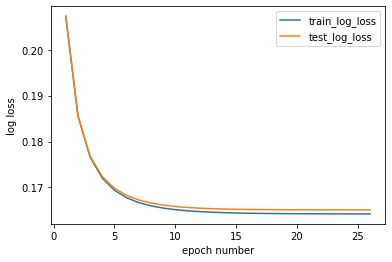

In [85]:
from matplotlib import pyplot as plt
epoch = [i for i in range(1,convergence+1,1)]

plt.plot(epoch,train_loss , label='train_log_loss')
plt.plot(epoch,test_loss, label='test_log_loss')
plt.xlabel("epoch number")
plt.ylabel("log loss")
plt.legend()
plt.show

<font color='blue'>Calculating accuracy </font>

In [86]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
accuracy_train = (1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
accuracy_test = (1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

print(f"Train accuracy = {accuracy_train} \nTest accuracy = {accuracy_test}")

Train accuracy = 0.9514666666666667 
Test accuracy = 0.9488


# <font color='Violet'>Conclusion : We have successfully implemented logistic regression with SGD from scratch without using Sklearn</font>